the linear model can be generalized that the objective of time series forecasting is to develop a function f that predicts xt in terms of the observations at previous p points of time:

xt = f(xt-1,xt-2, ... ,xt-p)

## MLP

In [0]:
from __future__ import print_function
import os
import sys
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [0]:
tsla = pdr.get_data_yahoo('TSLA', 2011)

In [0]:
tsla.shape

(2186, 6)

In [0]:
#Let's see the first five rows of the DataFrame
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,27.000000,25.900000,26.84,26.620001,1283000,26.620001
2011-01-04,26.950001,26.020000,26.66,26.670000,1187400,26.670000
2011-01-05,26.900000,26.190001,26.48,26.830000,1446700,26.830000
2011-01-06,28.000000,26.809999,26.83,27.879999,2061200,27.879999
2011-01-07,28.580000,27.900000,28.00,28.240000,2247900,28.240000


In [0]:
tsla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2186.000000,2186.000000,2186.000000,2186.000000,2.186000e+03,2186.000000
mean,191.364730,184.685494,188.122127,188.122603,5.538037e+06,188.122603
std,111.722165,108.205411,110.032645,110.032507,4.667409e+06,110.032507
min,22.270000,21.110001,21.780001,21.830000,2.396000e+05,21.830000
25%,38.719999,37.447500,38.172499,38.137501,2.191975e+06,38.137501
50%,218.180000,210.270004,214.650002,214.924995,4.629850e+06,214.924995
75%,268.830002,260.547501,264.397499,264.807503,7.280775e+06,264.807503
max,389.609985,379.350006,386.690002,385.000000,3.716390e+07,385.000000


To make sure that the rows are in the right order of date and time of observations, a new column datetime is created from the date and time related columns of the DataFrame. The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order over this column.

Text(0.5, 1.0, 'Tesla Motors Closing Price')

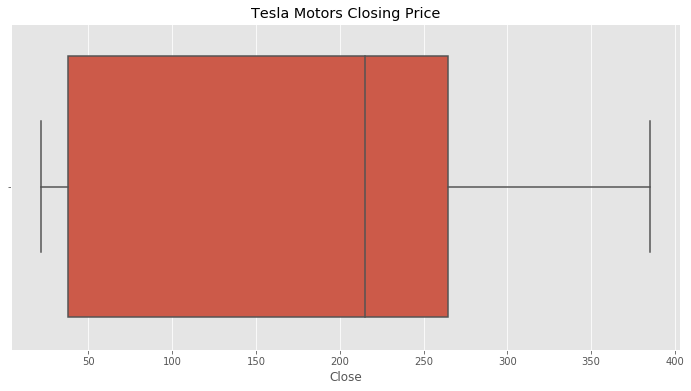

In [0]:
plt.figure(figsize=(12,6))
g = sns.boxplot(tsla.Close)
g.set_title('Tesla Motors Closing Price')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


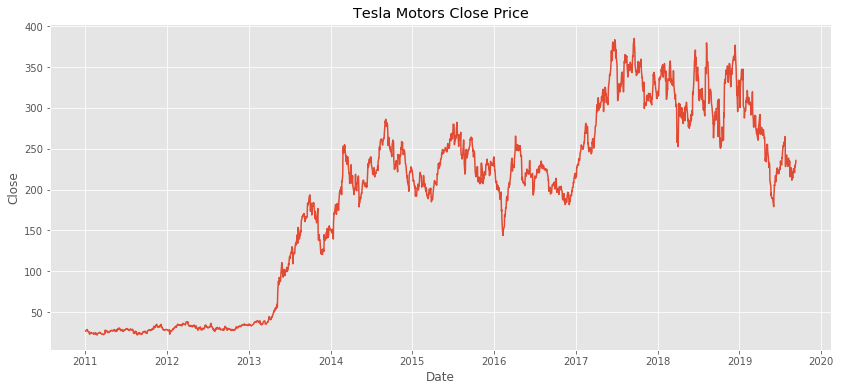

In [0]:
plt.figure(figsize=(14,6))
g = sns.lineplot(tsla.index,tsla.Close) 
g.set_title('Tesla Motors Close Price');

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

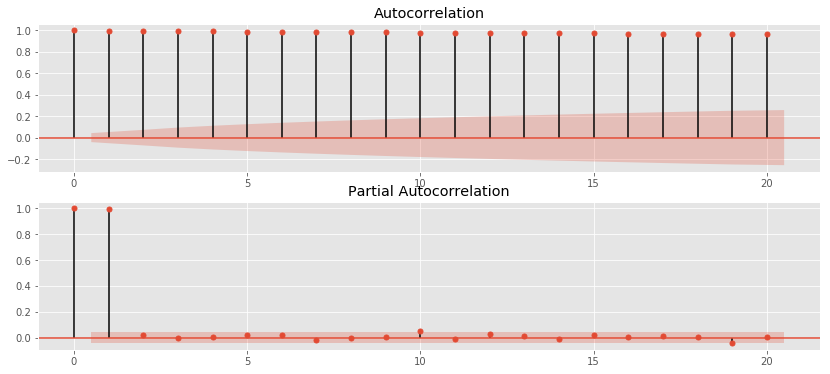

In [0]:
plt.figure(figsize=(14,6))
ax1 = plt.subplot(211)
plot_acf(tsla['Close'], lags=20, ax=ax1);
ax2 = plt.subplot(212)
plot_pacf(tsla['Close'], lags=20, ax=ax2);

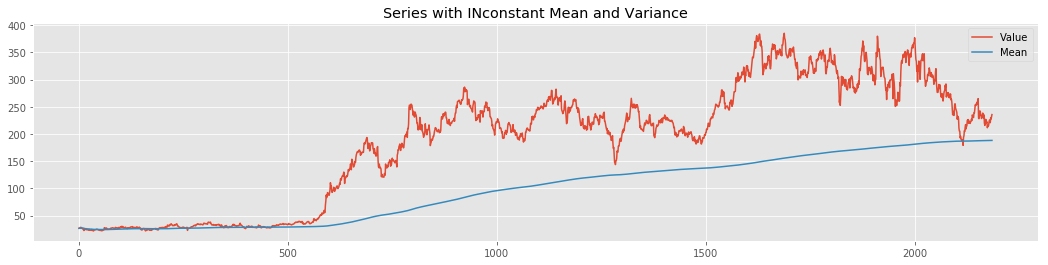

In [0]:
mean = [np.mean(tsla.Close.values[:x]) for x in range(tsla.Close.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tsla.Close.values, label='Value')
plt.plot(mean, label='Mean')
plt.title('Series with INconstant Mean and Variance')
plt.legend()
plt.show()

Before training the model, the dataset is split in two parts - train set and validation set. The neural network is trained on the train set. This means computation of the loss function, back propagation and weights updated by a gradient descent algorithm is done on the train set. The validation set is used to evaluate the model and to determine the number of epochs in model training. Increasing the number of epochs will further decrease the loss function on the train set but might not necessarily have the same effect for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train the model. All the steps involved in model training and validation is done by calling appropriate functions of the Keras API.



In [0]:
tsla = tsla[['High', 'Low', 'Open', 'Volume', 'Close']]
tsla = tsla[tsla.index>'2014']

In [0]:
split_date = datetime.datetime(year=2019, month=5, day=1, hour=0)
df_train = tsla.loc[tsla.index<split_date]
df_val = tsla.loc[tsla.index>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (1340, 5)
Shape of test: (92, 5)


In [0]:
df_train.head()

,High,Low,Open,Volume,Close
Date,,,,,
2014-01-02,152.479996,146.550003,149.800003,6188400,150.100006
2014-01-03,152.190002,148.600006,150.000000,4695000,149.559998
2014-01-06,150.399994,145.240005,150.000000,5361100,147.000000
2014-01-07,150.399994,145.250000,147.619995,5034100,149.360001
2014-01-08,153.699997,148.759995,148.850006,6163200,151.279999


In [0]:
df_val.head()

,High,Low,Open,Volume,Close
Date,,,,,
2019-05-01,240.000000,231.500000,238.850006,10704400,234.009995
2019-05-02,247.130005,237.720001,245.520004,18159300,244.100006
2019-05-03,256.609985,243.490005,243.860001,23706800,255.029999
2019-05-06,258.350006,248.500000,250.020004,10833900,255.339996
2019-05-07,257.209991,245.100006,256.799988,10131400,247.059998


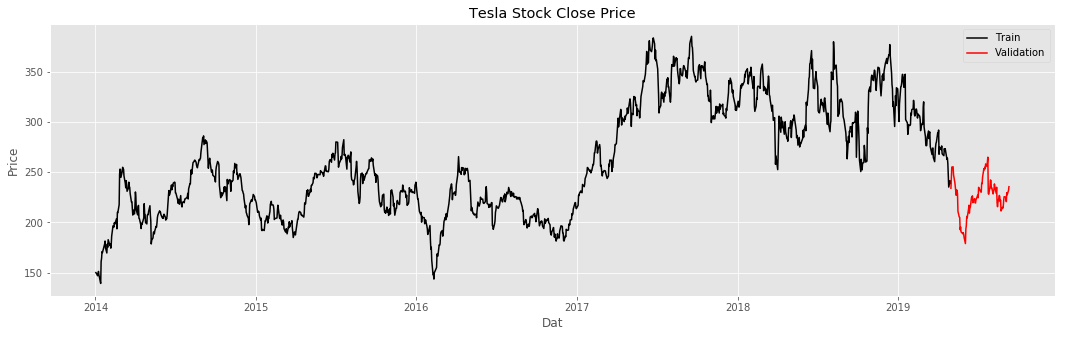

In [0]:
plt.figure(figsize=(18,5))
plt.title('Tesla Stock Close Price')
plt.plot(df_train['Close'], color='black')
plt.plot(df_val['Close'], color='red')
plt.legend(['Train','Validation'])
plt.xlabel('Dat')
plt.ylabel('Price')
plt.show()

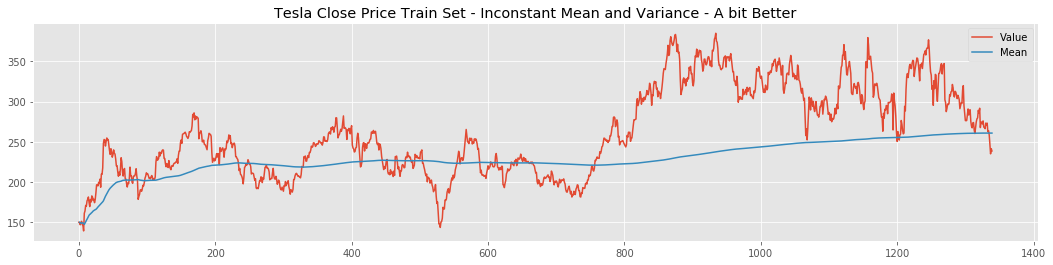

In [0]:
mean = [np.mean(df_train.Close.values[:x]) for x in range(df_train.Close.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(df_train.Close.values, label='Value')
plt.plot(mean, label='Mean')
plt.title('Tesla Close Price Train Set - Inconstant Mean and Variance - A bit Better')
plt.legend()
plt.show()

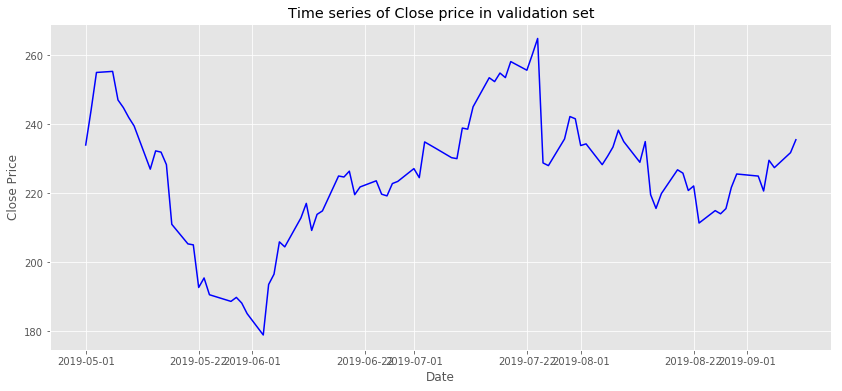

In [0]:
plt.figure(figsize=(14, 6))
g = sns.lineplot(df_val.index, df_val.Close, color='b')
g.set_title('Time series of Close price in validation set')
g.set_ylabel('Close Price');

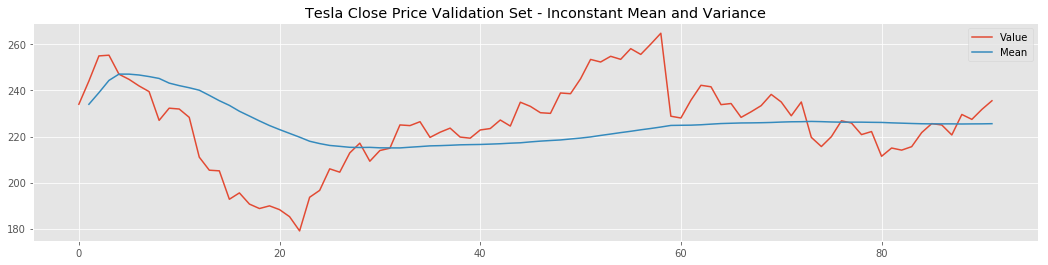

In [0]:
mean = [np.mean(df_val.Close.values[:x]) for x in range(df_val.Close.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(df_val.Close.values, label='Value')
plt.plot(mean, label='Mean')
plt.title('Tesla Close Price Validation Set - Inconstant Mean and Variance')
plt.legend()
plt.show()

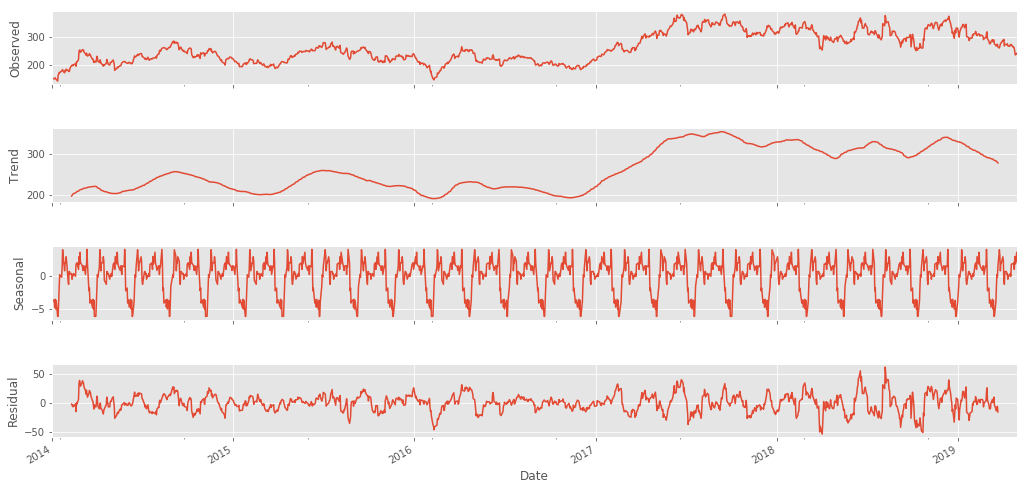

In [0]:
# weekly chart with cycles that repeat every 52 weeks (1 year)
season = seasonal_decompose(df_train.Close, freq=52)
fig = season.plot();
fig.set_size_inches(16,8)

In [0]:
#Dickey Fuller Test fot Stationarity 
adfinput = adfuller(df_train['Close'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test      -2.9264
P-value                              0.0424
Used Lags                            0.0000
Number of comments used           1339.0000
Critical Value (1%)                 -3.4352
Critical Value (5%)                 -2.8637
Critical Value (10%)                -2.5679
dtype: float64

In this case the Dickey Fuller test indicated that the series is not stationary (P value 6.7% and the critical value 5% is less than the statistical test)

In [0]:
kpss_input = kpss(df_train['Close'])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test

Statistical Test KPSS     3.3581
P-Value                   0.0100
Used Lags                23.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

Confirming the Dickey Fuller test, the KPSS test also shows that the series is not stationary because the P value is at 1% and the statistical test is above any critical value.

## Turning into Stationary Series

In [0]:
#creating a function to plot the graph and show the test result:
def adfuller_test(series, figsize=(18,4), plot=True, title=""):
    if plot:
        series.plot(figsize=figsize, title=title)
        plt.show()
    #Dickey Fuller test on the first differentiation
    adf = adfuller(series)
    output = pd.Series(adf[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                        'Used Lags', 'Number of comments used'])
    output = round(output,4)
    
    for key, value in adf[4].items():
        output["Critical Value (%s)"%key] = value.round(4) 
    return output

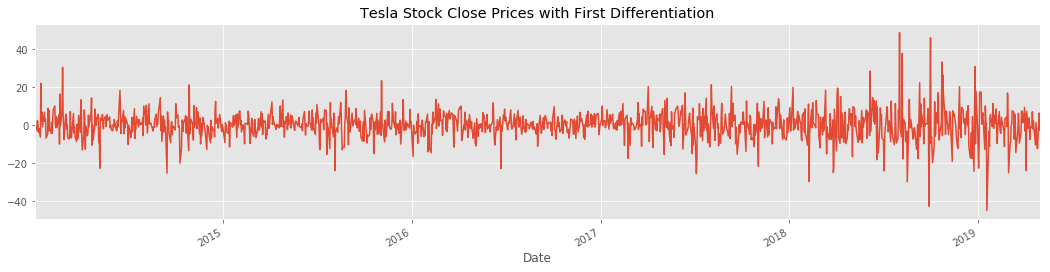

Dickey Fuller Statistical Test     -37.3496
P-value                              0.0000
Used Lags                            0.0000
Number of comments used           1338.0000
Critical Value (1%)                 -3.4352
Critical Value (5%)                 -2.8637
Critical Value (10%)                -2.5679
dtype: float64

In [0]:
adfuller_test(df_train['Close'].diff().dropna(), title='Tesla Stock Close Prices with First Differentiation')

In [0]:
train_set = df_train.values 
test_set = df_val.values 

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range -1, 1. Many sources relax the boundary to even -3, 3. 

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_close_price = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)
train_close_price = scaler_close_price.fit(df_train.Close.values.reshape(-1,1))

In [0]:
#First five rows of train
train_set_scaled.shape

(1340, 5)

In [0]:
#First five rows of validation
train_set_scaled

array([[0.02258768, 0.04071207, 0.03777571, 0.16630843, 0.04380041],
       [0.02139237, 0.04915942, 0.03858808, 0.12097063, 0.04160222],
       [0.01401424, 0.03531402, 0.03858808, 0.14119261, 0.03118132],
       ...,
       [0.41086517, 0.38923687, 0.43056176, 0.65727973, 0.38996988],
       [0.39973621, 0.39352232, 0.38734311, 0.48586799, 0.41573721],
       [0.40068428, 0.41342508, 0.4125269 , 0.26576987, 0.40442076]])

Now we need to generate regressors (X) and target variable (y) for train and validation. A 2D array of regressors and 1-D array of target is created from the original 1-D array of the scaled_PRES column in the DataFrames. For the time series forecasting model, the past seven days of observations are used to predict for the next day. This is equivalent to an AR(7) model. We define a function that takes the original time series and the number of timesteps as input to return the arrays of X and y:

Create Train Set. This is the most crucial and tricky part.
We are creating a training data so that our model will take last 60 days of open, high, low and close prices and will predict the next day's or tomorrow's closing price.
So each sequence will have 4 dimensions and will be predicting the next close price in the sequence.

In [0]:
nb_timesteps = 2

def makeXy(ts, nb_timesteps, features='itself'): 
    """ 
    Input:  
           ts: original time series 
           nb_timesteps: number of time steps in the regressors 
           features: itself == use the previous values of the label only
                     all == use previous values of all avaialable data
    Output:  
           X: 2-D array of regressors 
           y: 1-D array of target  
   """
    x_train = []
    y_train = []

    for i in range(nb_timesteps, ts.shape[0]):
        if features == 'itself':
            x_train.append(train_set_scaled[i-nb_timesteps:i,-1])
        else:
            x_train.append(train_set_scaled[i-nb_timesteps:i, 0:])
        y_train.append(train_set_scaled[i, -1])

    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train 

In [0]:
X_train, y_train = makeXy(train_set_scaled, nb_timesteps) 
print('Shape of train arrays:', X_train.shape, y_train.shape) 

Shape of train arrays: (1338, 2) (1338,)


In [0]:
X_train

array([[0.04380041, 0.04160222],
       [0.04160222, 0.03118132],
       [0.03118132, 0.0407881 ],
       ...,
       [0.48571198, 0.44081253],
       [0.44081253, 0.38996988],
       [0.38996988, 0.41573721]])

In [0]:
data = pd.concat([df_train, df_val], axis=0)
data.reset_index(inplace=True, drop=True)

In [0]:
inputs = data[len(data)-len(df_val) - nb_timesteps :].values
inputs = inputs.reshape(-1,5)
inputs.shape

(94, 5)

In [0]:
inputs = scaler.transform(inputs)

In [0]:
X_val, y_val = makeXy(inputs, nb_timesteps)
X_val.shape, y_val.shape

((92, 2), (92,))

In [0]:
y_train

array([0.03118132, 0.0407881 , 0.04860377, ..., 0.38996988, 0.41573721,
       0.40442076])

## Create the MLP Nerural Netork Architecture

In [0]:
from keras.layers import Dense, Input, Dropout, Flatten
from keras.optimizers import SGD 
from keras.models import Model, Sequential
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint 

The input layer is declared with shape (None, timesteps, 5) and of type float32. None indicates the number of instances that is determined at runtime:

In [0]:
input_layer = Input(shape=(X_train.shape[1],), dtype='float32') 

Dense layers are declared with linear activation:

In [0]:
dense1 = Dense(128, activation='linear')(input_layer) 
dense2 = Dense(63, activation='linear')(dense1) 
dense3 = Dense(32, activation='linear')(dense2) 

Multiple hidden layers and large number of neurons in each hidden layer gives neural networks the ability to model complex non-linearity of the underlying relations between regressors and the target. However, deep neural networks can also overfit train data and give poor results on validation or test set. Dropout has been used to regularize deep neural networks. In this example, a dropout layer is added before the output layer. Dropout randomly sets p fraction of input neurons to zero before passing to the next layer. Randomly dropping inputs essentially acts as bootstrap aggregating or bagging type of model ensembling. Random forest uses bagging by building trees on random subsets of input features. We use p=0.2 to dropout 20% of randomly selected input features:

In [0]:
dropout_layer = Dropout(0.2)(dense3)

In [0]:
output_layer = Dense(1, activation='linear')(dropout_layer) 

The input, dense, and output layers will now be packed inside a Model, which is the wrapper class to train and make predictions. Mean square error (MSE) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice to train deep neural networks. Unlike stochastic gradient descent, Adam uses different learning rates for each weight and separately updates them as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients:

In [0]:
ts_model = Model(inputs=input_layer, outputs=output_layer) 
ts_model.compile(loss='mean_squared_error', optimizer='adam') 
ts_model.summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_15 (Dense)             (None, 63)                8127      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 10,592
Trainable params: 10,592
Non-trainable params: 0
_______________________________________________________

The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for an instance of backpropagation. The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch at which the loss function has been minimum:

In [0]:
!mkdir "keras_models"

In [0]:
save_weights_at = os.path.join('keras_models', 'tsla_close_price_weights.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            period=1) 
ts_model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 

In [0]:
best_model = load_model("/content/keras_models/tsla_close_price_weights.32-0.0009.hdf5") 
predicted_price = best_model.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(92,)

In [0]:
np.sqrt(np.square(np.mean(df_val.Close-predicted_price)))

22.707566966181215

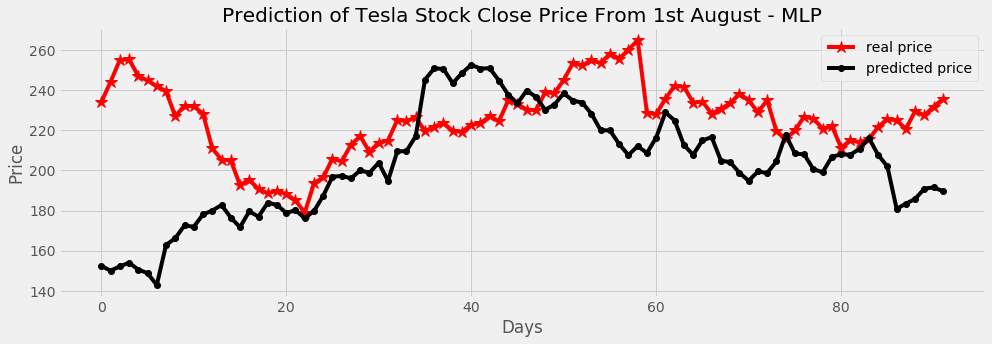

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val.Close.values, c='r', label='real price', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(predicted_price, c='k', label='predicted price', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Prediction of Tesla Stock Close Price From 1st August - MLP')
plt.tight_layout()
plt.savefig('PricePlot.png')

# Let's TRY LSTM. Recurrent Neural Network.

In [0]:
X_train, y_train = makeXy(train_set_scaled, nb_timesteps, features='all') 
print('Shape of train arrays:', X_train.shape, y_train.shape) 
X_val, y_val = makeXy(inputs, nb_timesteps, features='all')
X_val.shape, y_val.shape

Shape of train arrays: (1338, 2, 5) (1338,)


((92, 2, 5), (92,))

In [0]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Bidirectional, InputLayer
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [0]:
regressor = Sequential()

regressor.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(CuDNNLSTM(units=200, return_sequences=True, ))
regressor.add(Dropout(rate=0.2))
regressor.add(CuDNNLSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(CuDNNLSTM(units=75, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
regressor.add(CuDNNLSTM(units=50))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units=1))


regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_9 (CuDNNLSTM)     (None, 2, 200)            165600    
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 200)            0         
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 2, 100)            120800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 100)            0         
_________________________________________________________________
cu_dnnlstm_11 (CuDNNLSTM)    (None, 2, 75)             53100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 2, 75)             0         
_________________________________________________________________
cu_dnnlstm_12 (CuDNNLSTM)    (None, 50)               

In [0]:
#!rm -rf "keras_models_lstm"
!mkdir "keras_models_lstm"

mkdir: cannot create directory ‘keras_models_lstm’: File exists


In [0]:
regressor.compile(loss='mean_squared_error', optimizer='adam')
save_weights_at = os.path.join('keras_models_lstm', 'tsla_close_price_lstm_weights.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            period=1) 
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=100, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 

In [0]:
regressor.load_weights("/content/keras_models_lstm/tsla_close_price_lstm_weights.95-0.0010.hdf5") 
predicted_price = regressor.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(92,)

In [0]:
np.sqrt(np.square(np.mean(df_val.Close-predicted_price)))

22.379929584005605

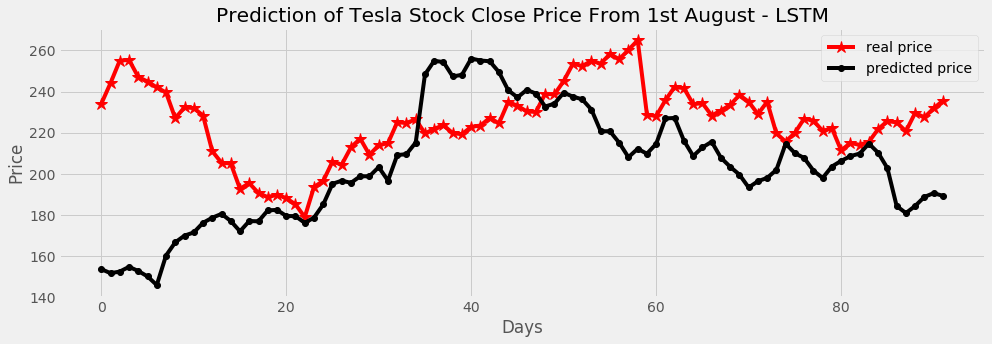

In [0]:
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val.Close.values, c='r', label='real price', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(predicted_price, c='k', label='predicted price', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Prediction of Tesla Stock Close Price From 1st August - LSTM')
plt.tight_layout()


In [0]:
X_train, y_train = makeXy(train_set_scaled, nb_timesteps) 
print('Shape of train arrays:', X_train.shape, y_train.shape) 
X_val, y_val = makeXy(inputs, nb_timesteps)
X_val.shape, y_val.shape

Shape of train arrays: (1338, 2) (1338,)


((92, 2), (92,))

In [0]:
X_train = X_train.reshape(1338,2,1)
X_val = X_val.reshape(92,2,1)

In [0]:
regressor = Sequential()

regressor.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(CuDNNLSTM(units=200, return_sequences=True, ))
regressor.add(Dropout(rate=0.2))
regressor.add(CuDNNLSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(CuDNNLSTM(units=75, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
regressor.add(CuDNNLSTM(units=50))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units=1))


regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_13 (CuDNNLSTM)    (None, 2, 200)            162400    
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 200)            0         
_________________________________________________________________
cu_dnnlstm_14 (CuDNNLSTM)    (None, 2, 100)            120800    
_________________________________________________________________
dropout_17 (Dropout)         (None, 2, 100)            0         
_________________________________________________________________
cu_dnnlstm_15 (CuDNNLSTM)    (None, 2, 75)             53100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 75)             0         
_________________________________________________________________
cu_dnnlstm_16 (CuDNNLSTM)    (None, 50)               

In [0]:
#!rm -rf "keras_models_lstm"
!mkdir "keras_models_lstm"

In [0]:
regressor.compile(loss='mean_squared_error', optimizer='adam')
save_weights_at = os.path.join('keras_models_lstm', 'tsla_close_price_lstm_weights.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            period=1) 
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=100, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 

In [0]:
regressor.load_weights("/content/keras_models_lstm/tsla_close_price_lstm_weights.92-0.0010.hdf5") 
predicted_price = regressor.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(92,)

In [0]:
np.sqrt(np.square(np.mean(df_val.Close-predicted_price)))

22.004158185875934

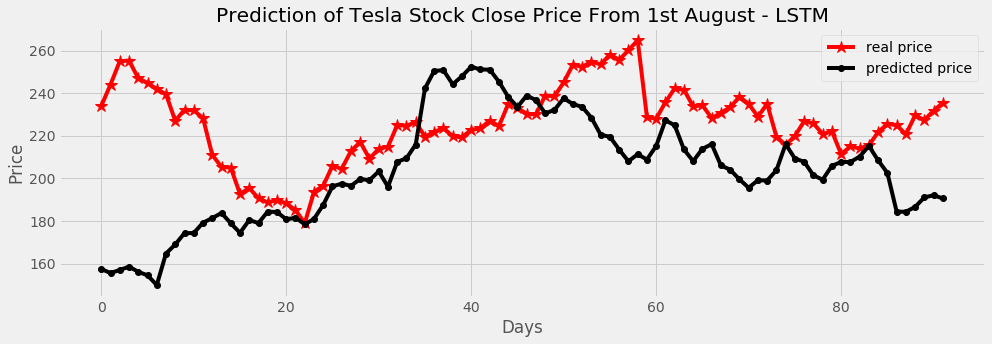

In [0]:
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val.Close.values, c='r', label='real price', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(predicted_price, c='k', label='predicted price', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Prediction of Tesla Stock Close Price From 1st August - LSTM')
plt.tight_layout()


# 1D-CNN Network for Time Series 

In [0]:
from keras.layers import Input, Dense, Flatten, Dropout
from keras.layers.convolutional import ZeroPadding1D, Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

ZeroPadding1D layer is added next to add zeros at the beginning and end of each series. Zeropadding ensure that the downstream convolution layer does not reduce the dimension of the output sequences. Pooling layer, added after the convolution layer is used to downsampling the input.

In [0]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2]), dtype='float32')
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

The first argument of Conv1D is the number of filters, which determine the number of features in the output. Second argument indicates length of the 1D convolution window. The third argument is strides and represent the number of places to shift the convolution window. Lastly, setting use_bias as True, add a bias value during computation of an output feature. Here, the 1D convolution can be thought of as generating local AR models over rolling window of three time units.

In [0]:
#Add 1D convolution layer
conv1D_layer = Conv1D(64, 6, strides=1, use_bias=True)(zeropadding_layer)

AveragePooling1D is added next to downsample the input by taking average over pool size of three with stride of one timesteps. The average pooling in this case can be thought of as taking moving averages over a rolling window of three time units. We have used average pooling instead of max pooling to generate the moving averages.

In [0]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=6, strides=1)(conv1D_layer)

In [0]:
#Add 1D convolution layer
conv1D_layer2 = Conv1D(64, 3, strides=1, use_bias=True)(avgpooling_layer)
#Add AveragePooling1D layer
avgpooling_layer2 = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

The preceeding pooling layer returns 3D output. Hence before passing to the output layer, a Flatten layer is added. The Flatten layer reshapes the input to (number of samples, number of timesteps*number of features per timestep), which is then fed to the output layer

In [0]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer2)
dropout_layer = Dropout(0.2)(flatten_layer)

In [0]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making predictions. Mean squared error (MSE) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [0]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 60, 5)             0         
_________________________________________________________________
zero_padding1d_3 (ZeroPaddin (None, 62, 5)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 57, 64)            1984      
_________________________________________________________________
average_pooling1d_2 (Average (None, 52, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 64)            12352     
_________________________________________________________________
average_pooling1d_4 (Average (None, 48, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0   

In [0]:
!mkdir keras_models_cnn

mkdir: cannot create directory ‘keras_models_cnn’: File exists


In [0]:
save_weights_at = "keras_models_cnn/close_price_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5"
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=32, epochs=150,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 1344 samples, validate on 28 samples
Epoch 1/150
1344/1344 [==============================] - 0s 136us/step - loss: 0.0437 - val_loss: 0.0393
Epoch 2/150
1344/1344 [==============================] - 0s 127us/step - loss: 0.0402 - val_loss: 0.0347
Epoch 3/150
1344/1344 [==============================] - 0s 120us/step - loss: 0.0424 - val_loss: 0.0353
Epoch 4/150
1344/1344 [==============================] - 0s 115us/step - loss: 0.0413 - val_loss: 0.0366
Epoch 5/150
1344/1344 [==============================] - 0s 114us/step - loss: 0.0383 - val_loss: 0.0390
Epoch 6/150
1344/1344 [==============================] - 0s 115us/step - loss: 0.0383 - val_loss: 0.0375
Epoch 7/150
1344/1344 [==============================] - 0s 119us/step - loss: 0.0459 - val_loss: 0.0523
Epoch 8/150
1344/1344 [==============================] - 0s 135us/step - loss: 0.0365 - val_loss: 0.0351
Epoch 9/150
1344/1344 [==============================] - 0s 134us/step - loss: 0.0397 - val_loss: 0.0484
Epoch 10/

In [0]:
best_model = load_model("/content/keras_models_cnn/close_price_1DConv_weights.142-0.0277.hdf5") 
predicted_price = best_model.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(28,)

In [0]:
np.sqrt(np.square(np.mean(df_val.Close-predicted_price)))

17.715973445347377

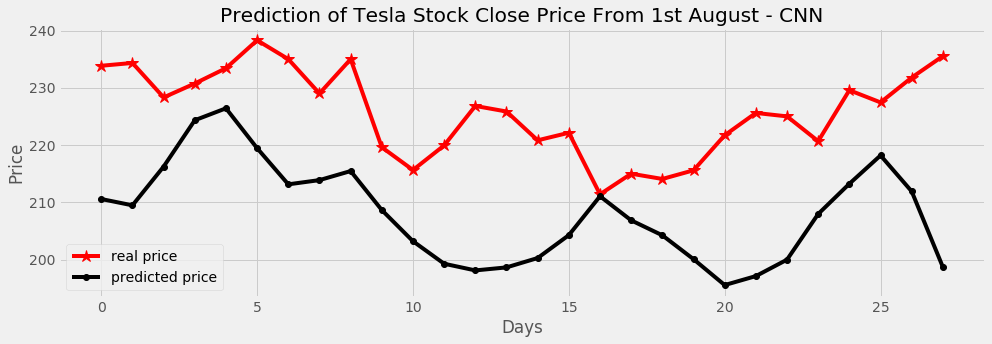

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val.Close.values, c='r', label='real price', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(predicted_price, c='k', label='predicted price', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.title('Prediction of Tesla Stock Close Price From 1st August - CNN')
plt.tight_layout()
